In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
from google.colab import drive
import statsmodels.api as sm
from statistics import mean 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#Camilla's Path

df = pd.read_csv('/content/gdrive/My Drive/pres_survey_data_hashed.csv')
cb = pd.read_csv('/content/gdrive/My Drive/modeling_codebook_categorized.csv')
groups = pd.read_csv('/content/gdrive/My Drive/party_primary_drafts_v3.csv')
og_data = pd.read_csv('/content/gdrive/My Drive/bluelabs_historical_data.csv') # This is the data originally labelled "columbia_qmss_survey_ids_hashed000"

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,249) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Will's path to updated data file
df = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/Presidential Model Team/pres_survey_data_hashed.csv')
cb = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/Modeling Codebook - Categorized.csv')
groups = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/Presidential Model Team/Old Models/party_primary_drafts_v3.csv')
og_data = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/bluelabs.data.csv') # This is the data originally labelled "columbia_qmss_survey_ids_hashed000"

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,250) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Create non registered states dataframe
df.indy.unique()
non_registered_states = df[ df['indy'] != 1]
non_registered_states = non_registered_states[ non_registered_states['rep'] != 1]
non_registered_states = non_registered_states[ non_registered_states['dem'] != 1]

In [ ]:
# Get registered states by subsetting the data to any rows thats not in the non-registered dataframe
registered_states = pd.concat([df,non_registered_states]).drop_duplicates(keep=False)
pd.set_option('display.max_columns', None)
registered_states.head()

,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,Unnamed: 0.1,hash_id,survey_id,support_senate,support_pres,support_gov,reg_voter_flag,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,indy,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2020,early_vote_method_g2018,ineligible_2008to2022
0,0,0,0,1,0,0,0,0,1,5f545c02ab9f132b73c4ff3b0475b8ea,KY-Senate 2020,3.0,2.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505079,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1,1,0,0,1,0,0,1,0,2,945df063f9271be5a7186f04e8a8ecef,NaN,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476430,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
2,2,0,0,1,0,0,1,0,3,945df063f9271be5a7186f04e8a8ecef,KY-Senate 2020,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476430,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3,5,0,0,1,1,0,0,0,6,986c72c725f539ed68ddce408761c943,KY-Senate 2020,6.0,7.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.541669,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
4,6,0,1,0,0,0,0,0,7,991b444884baa809464ae338dd50ba4e,KY-Senate 2020,1.0,7.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.904450,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0


### Logistic Regression on Registered States

Function that cleans data both row-and column-wise

In [ ]:
def clean(df):
  #Remove indy and first index
  remove_these_cols = ['indy', "Unnamed: 0.1"] 
  df = df.drop(columns = remove_these_cols)

  #Removing IDs where reg_voter_flag = 0 (unregistered voters)
  df = df[ df['reg_voter_flag'] == 1]

  #Remove any rows if they have more than 10 missing values
  df = df
  df = df[df.isnull().sum(axis=1) < 10]

  return(df)

Function that fills missing numeric values with mean and categorical with mode

In [ ]:
#Data Preprocessing (Convert categorical items to numeric)
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

def fill_missing(df):
  #Fill missing values with ~mode~ for CATEGORICAL data
  df_cat = df.select_dtypes(include=['O']) #Subset data down to categorical (object) type
  df_cat.fillna(df_cat.mode().iloc[0])

  df_cat = Encoder(df_cat)

  #Fill missing values with ~mean~ for NUMERIC data
  df_num = df.select_dtypes(include=[np.number]) #Subset data to columns of numeric type
  df_num = df_num.fillna(df_num.mean()) #Impute NAs with mean

  #concatenate df_num with df_cat
  df2 = pd.concat([df_num, df_cat], axis=1)

  return(df2)

In [ ]:
reg_hashed = clean(registered_states)
reg = fill_missing(reg_hashed)
reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,support_senate,support_pres,support_gov,reg_voter_flag,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2020,early_vote_method_g2018,ineligible_2008to2022,hash_id,survey_id
0,0,0,0,1,0,0,0,0,3.0,2.000000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505079,0.0,0.0,0.0,1.0,18.529438,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,6351,0
1,1,0,0,1,0,0,1,0,1.0,2.193222,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.322544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476430,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,9845,2
2,2,0,0,1,0,0,1,0,1.0,1.000000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.322544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476430,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,9845,0
3,5,0,0,1,1,0,0,0,6.0,7.000000,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.541669,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,10115,0
4,6,0,1,0,0,0,0,0,1.0,7.000000,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.904450,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,10164,0


In [ ]:
##Drop all observations where support_pres is not dem or rep
reg = reg[(reg.support_pres == 1.0) | (reg.support_pres == 3.0)]

a = {1: 1, 3: 0} #Convert support_pres to binary, where support democrat = 1
reg['support_pres'] = reg['support_pres'].map(a)
reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,support_senate,support_pres,support_gov,reg_voter_flag,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2020,early_vote_method_g2018,ineligible_2008to2022,hash_id,survey_id
2,2,0,0,1,0,0,1,0,1.0,1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.322544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476430,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,9845,0
8,10,0,0,1,0,0,1,0,11.0,1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875740,0.0,0.0,0.0,1.0,18.529438,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,9648,0
15,17,0,0,1,0,0,1,0,6.0,1,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.322544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387709,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,14117,0
19,21,1,0,0,0,1,0,0,1.0,1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.322544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547570,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,345,0
22,24,0,0,1,0,0,0,1,1.0,1,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,15.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.491959,0.0,0.0,1.0,0.0,18.529438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.248051,0,8537,0


In [ ]:
#Manage the missing variables
keep = [column for column
        in list(reg)
        if len(reg[column].unique()) > 1]

reg = reg[keep]

In [ ]:
#Train Test Split

#Remove hash_id and index column (for now)

y = reg['support_pres']
X = reg.loc[:, (reg.columns != 'support_pres')] #This X keeps the hash ID and Index column
X1 = X.loc[:, X.columns != 'hash_id']
X1 = X.loc[:, X.columns != 'Unnamed: 0']

X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42) 


In [ ]:
#Logistic regression with L1 regularization 
logreg = LogisticRegression(penalty="l1",solver='liblinear',C=1).fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg .coef_))

logreg .coef_: [[ 1.90479165e-02 -2.18865388e-01 -6.84354926e-01 -7.74464480e-03
  -1.31487202e-01  0.00000000e+00  1.33743856e-01 -2.61698480e-01
   6.81858118e-01  3.88695584e-01  0.00000000e+00 -7.46046878e-02
  -2.30303142e-01 -1.61784569e-01 -8.07303304e-02 -3.56078775e-01
   9.27636129e-01  1.49216472e-01  0.00000000e+00  5.13105760e-01
   2.03020462e+00 -2.54588440e+00  3.41615812e-01 -1.27900482e-02
  -2.82782249e-02 -8.67832577e-02  1.11900825e-01 -1.87409523e-02
   2.38771310e-01  2.75696221e-01 -3.71672950e-01  6.31519904e-01
   5.73166413e-01 -6.26856045e-02 -2.47389635e-01  5.86306218e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.78409342e-01
   0.00000000e+00  8.16963743e-01  1.37331054e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.89175395e-01  2.76741418e-01
   3.33418438e-01  0.00000000e+00  0.00000000e+00  5.33861719e-01
  -1.14385902e+00  1.56322128e+00  1.07393391e+00 -1.40431424e+00
  -5.72377282e-02  0.00000000e+00  0.00000000e+00  0.00000000

In [ ]:
#Printing Training Test Scores

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.900
Test set score: 0.903


In [ ]:
#Visualizing Predictions
predicted_vals = logreg.predict(X_test) 
print("logreg.predict: {}".format(predicted_vals))

logreg.predict: [0 0 0 ... 0 1 0]


In [ ]:
param_grid = {'C': np.arange(1, 100, 2)}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)

#grid.fit(X_train, y_train)

#print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
#print("best parameters: {}".format(grid.best_params_))
#print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
k=logreg .coef_
kk=k>0.00000001
kk=kk[0].tolist()
qq=X1.columns
fs=X1.loc[:,kk]
print(kk)
print(fs.columns)

[True, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, True, True, False, True, True, False, True, False, False, False, True, False, True, True, False, True, True, False, False, True, False, False, False, False, False, True, True, False, False, False, True, True, True, False, False, True, False, True, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, True, True, False, False, True, False, True, False, False, False, True, False, False, True, False, False, True, True, True, True, True, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False]
Index(['bInner Ring', 'Income 125k+', 'age_a22to29', 'age_b30to39', 'black',
       'hispanic', 'other_ethnicity', 'dem', 'single', 'homeowner',
       'bach_degree_modeled', 'post_grad_modeled', 'absentee_voter',
       'permanent_absentee_voter', 'midterm_primary_ever', 'indy_primary_only',
       'dem_

In [ ]:
#Convert index into list of important features
selected_vars = fs.columns.tolist()

#Subset the data based on if the variable is in the list of important features (if yes then keep)
new_reg = pd.DataFrame()
for col in reg:
  if (col in selected_vars) or col == 'support_pres':
    new_reg = pd.concat([new_reg, reg[col]], axis=1)

# Monte Carlo Modeling (Registered States)

In [ ]:
full_sample = new_reg.dropna()

sample_size_list = [100, 200, 500, 1000, 2000, 5000, len(full_sample)]
random_state_list = range(1,101)

sample_list_of_lists = []
for size in sample_size_list:
  sample_list = []
  for n in random_state_list:
    sample = full_sample.sample(n = size, random_state = n)
    sample_list.append(sample)
  sample_list_of_lists.append(sample_list)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
from warnings import filterwarnings
from sklearn.model_selection import train_test_split, KFold, cross_val_score
filterwarnings('ignore')

cv = KFold(n_splits = 5, shuffle=True, random_state = 42)

score_list_of_lists = []
for sample_list in sample_list_of_lists:
  score_list = []
  for sample in sample_list:
    X = sample.drop(['support_pres'], axis=1)
    y = sample['support_pres']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    logreg = LogisticRegression(random_state = 42).fit(X_train, y_train)
    score = np.mean(cross_val_score(logreg, X_test, y_test, cv = cv))
    score_list.append(score)
  score_list_of_lists.append(score_list)

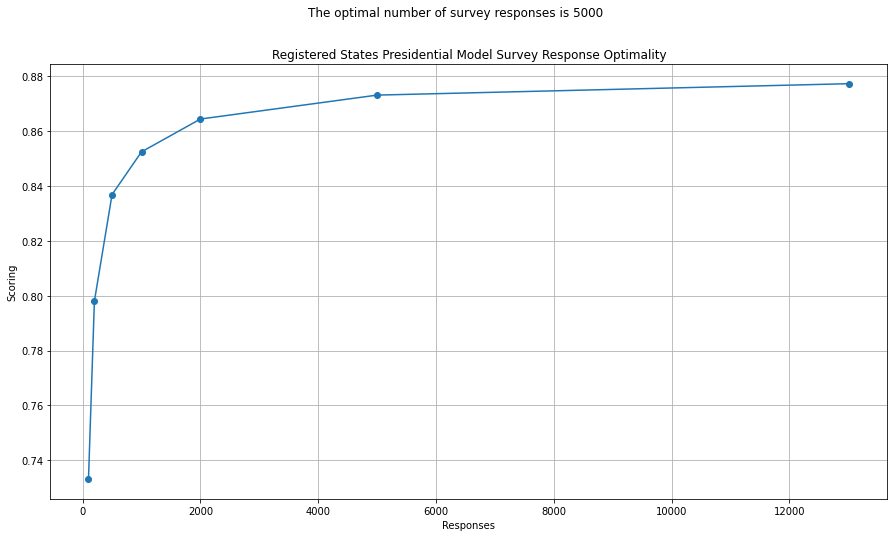

In [ ]:
mean_score_list = [np.mean(scores) for scores in score_list_of_lists]

import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.plot(sample_size_list, mean_score_list, marker = 'o')
plt.title("Registered States Presidential Model Survey Response Optimality")
plt.suptitle("The optimal number of survey responses is 5000")
plt.xlabel("Responses")
plt.ylabel("Scoring")
plt.grid(True)
plt.show()

#Input the dataframe into statsmodels regression

In [ ]:
#Split the data
y2 = new_reg['support_pres']
X2 = new_reg.loc[:, new_reg.columns != 'support_pres']

#Train test split 75/25
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42) 
Xs_train = sm.add_constant(X_train) #adding a constant fits a line for y = mx + b instead of just y = mx
Xs_test = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Logistic SM Regression, fitting on training data
logistic = sm.Logit(y_train, Xs_train)
pd.set_option('display.max_rows', None)
print(logistic.fit().params) #Get coefficients

Optimization terminated successfully.
         Current function value: 0.327654
         Iterations 7
const                      -2.826113
bInner Ring                 0.353156
Income 125k+                0.096234
age_a22to29                 0.750559
age_b30to39                 0.610028
black                       1.296848
hispanic                    0.405422
other_ethnicity             0.656060
dem                         3.662833
single                      0.675649
homeowner                  -0.014919
bach_degree_modeled         0.350085
post_grad_modeled           0.406491
absentee_voter              0.684876
permanent_absentee_voter    0.319956
midterm_primary_ever       -0.585245
indy_primary_only           1.631822
dem_primary_mr              1.660532
switch_primary_dem_mr       1.302377
switch_primary_rep_mr       0.037500
midterm_voter               0.247085
non_voter                   0.633454
rep_hhd                     0.456203
indy_hhod                   2.632883
hh_liberal

In [ ]:
results = logistic.fit() # Coefficients
results.summary()

Optimization terminated successfully.
         Current function value: 0.327654
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           support_pres   No. Observations:                 9764
Model:                          Logit   Df Residuals:                     9721
Method:                           MLE   Df Model:                           42
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.5248
Time:                        20:07:30   Log-Likelihood:                -3199.2
converged:                       True   LL-Null:                       -6732.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.8261      0.246    -11.478      0.000      -3.309      -2.344
bInner Ring                  0.3532      0.070      5.031      0.000       0.216       0.491
Income 125k+                 0.0962      0.082      1.176      0.240      -0.064       0.257
age_a22to29                  0.7506      0.202      3.717      0.000       0.355       1.146
age_b30to39                  0.6100      0.119      5.132      0.000       0.377       0.843
black                        1.2968      0.156      8.304      0.000       0.991       1.603
hispanic                     0.4054      0.157      2.578      0.010       0.097       0.714
other_ethnicity              0.6561      0.445      1.475      0.140      -0.215       1.528
dem                          3.6628      0.082     44.419      0.000       3.501       3.824
single                       0.6756      0.079      8.540      0.000       0.521       0.831
homeowner                   -0.0149      0.095     -0.157      0.875      -0.201       0.171
bach_degree_modeled          0.3501      0.082      4.244      0.000       0.188       0.512
post_grad_modeled            0.4065      0.095      4.280      0.000       0.220       0.593
absentee_voter               0.6849      0.075      9.113      0.000       0.538       0.832
permanent_absentee_voter     0.3200      0.145      2.211      0.027       0.036       0.604
midterm_primary_ever        -0.5852      0.080     -7.327      0.000      -0.742      -0.429
indy_primary_only            1.6318      0.402      4.062      0.000       0.844       2.419
dem_primary_mr               1.6605      0.106     15.707      0.000       1.453       1.868
switch_primary_dem_mr        1.3024      0.306      4.260      0.000       0.703       1.902
switch_primary_rep_mr        0.0375      0.188      0.199      0.842      -0.331       0.406
midterm_voter                0.2471      0.127      1.948      0.051      -0.002       0.496
non_voter                    0.6335      0.229      2.761      0.006       0.184       1.083
rep_hhd                      0.4562      0.167      2.730      0.006       0.129       0.784
indy_hhod                    2.6329      0.180     14.609      0.000       2.280       2.986
hh_liberal_donor_u           0.2645      0.217      1.220      0.222      -0.160       0.689
christian                    0.0090      0.084      0.107      0.915      -0.155       0.173
liberal_donor                0.2359      0.098      2.414      0.016       0.044       0.428
contbpol_1                   0.0797      0.099      0.802      0.423      -0.115       0.274
contbhlt_1                  -0.0403      0.094     -0.431      0.667      -0.224       0.143
professional_technical       0.1200      0.106      1.129      0.259      -0.088       0.328
apparel_1                    0.0962      0.084      1.150      0.250      -0.068       0.260
outdgrdn_1                   0.1188      0.101      1.172      0.241      -0.08

#Generating probabilities from TRAINing Data

True Probabilities

In [ ]:
predicted_probs_train = results.predict(Xs_train) # Generate predictions for training data
predicted_probs_train.head()

pp_df_train = pd.DataFrame(predicted_probs_train).reset_index() # Convert predicted probability array -> Dataframe
pp_df_train.columns =['index', 'predicted_probability'] # Add column names
pp_df_train.head()

,index,predicted_probability
0,11752,0.992471
1,812,0.085239
2,12336,0.987678
3,5815,0.990844
4,15112,0.967281


In [ ]:
# Merge this data with the original cleaned binary indexed data using the original cleaned binary index
df_with_pp_train = pd.merge(reg.reset_index(), pp_df_train, on = 'index')
df_with_pp_train = df_with_pp_train.drop(['hash_id'], axis = 1)#remove hash_id variable from this df

# Now Merge this data with the cleaned data (before preprocessing) using Unnamed:0
df_with_pp_train = pd.merge(df_with_pp_train, reg_hashed, on = 'Unnamed: 0')
df_with_pp_train.columns = df_with_pp_train.columns.str.replace(r'_x$', '') #Remove suffix for each column containing _x

# Merge one last time  with the OG data using hash_id and support pres

og_data2 = og_data[(og_data.support_pres == 1.0) | (og_data.support_pres == 3.0)] ##Drop all observations where support_pres is not dem or rep

a = {1: 1, 3: 0} #Convert og_data to binary, where support democrat = 1
og_data2['support_pres'] = og_data2['support_pres'].map(a)

df_with_pp_train = df_with_pp_train[["hash_id", "support_pres", "predicted_probability"]] #First, remove all columns except for hash_id and predicted probability

df_with_pp_train = pd.merge(df_with_pp_train, og_data2, on = ['hash_id', 'support_pres'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# From the data, keep only the variables that we want to get predicted probabilities for

# Get 'Variable' column of support model party primary drafts, tabs v3, return as a list 
og_variables = list(groups['Variable'])
# Remove the number and hyphen that comes before each name, i.e. "01 - topline" -> "topline"
for i in range(len(og_variables)):
  og_variables[i] = re.sub('[0-9]+ - ', '', og_variables[i])
# Remove duplicates
og_variables = [*set(og_variables)]
og_variables

['married',
 'demo_education_area',
 'topline',
 'education_modeled',
 'nyt_urbanicity',
 'demo_income_bucket_full',
 'demo_combined_ethnicity_4way',
 'region',
 'gender_female x married',
 'state_code',
 'demo_age_bucket_full',
 'demo_vote_history',
 'demo_combined_party',
 'gender_female',
 'retired']

In [ ]:
## Get average ~TRUE~ probability for each level in TRAINING data ##

# True probabilities empty list
true_probs_train_l = []
pp_group_train_df_true = pd.DataFrame() #!!!
# Group by and average each true probability for males
for var in og_variables:
  # If the variable matches a column in the data w/true prob then calculate true prob avg for each group within the column
  if var in df_with_pp_train: 
    pp_group_train = df_with_pp_train.groupby(var)['support_pres'].mean()
    print(pp_group_train)
    pp_group_train_df=pd.DataFrame(pp_group_train) #!!!
    pp_group_train_df_true=pd.concat([pp_group_train_df_true,pp_group_train_df]) #!!!
    true_probs_train_l = true_probs_train_l + pp_group_train.tolist() #Convert true probabilities to a huge list

#We also need to get the true prob average for 4 groups: average x married
true_married_x_gender = df_with_pp_train.groupby(['married','gender_female'])['support_pres'].mean()
print(true_married_x_gender)

married
0.0    0.638958
1.0    0.496800
Name: support_pres, dtype: float64
demo_education_area
01-High Education Area      0.579195
02-Medium Education Area    0.526343
03-Low Education Area       0.510391
Name: support_pres, dtype: float64
education_modeled
bach_degree    0.582917
hs_or_less     0.494571
post_grad      0.638710
Name: support_pres, dtype: float64
nyt_urbanicity
aUrban         0.687823
bInner Ring    0.599122
cOuter Ring    0.497900
dRural         0.418660
Name: support_pres, dtype: float64
demo_income_bucket_full
Income 00-30k       0.573320
Income 030k-50k     0.568883
Income 050k-75k     0.534228
Income 075k-125k    0.533654
Income 125k+        0.536160
Name: support_pres, dtype: float64
demo_combined_ethnicity_4way
A    0.592593
B    0.868307
H    0.629187
W    0.513410
Name: support_pres, dtype: float64
state_code
AK    0.000000
AZ    0.524798
CA    0.166667
CO    0.551265
CT    0.333333
DC    1.000000
DE    0.750000
FL    0.484799
IA    0.513699
ID    0.666667
KS 

In [ ]:
## Get average ~PREDICTED~ probability for each level in TRAINING data ##

# Predicted probabilities empty list
pred_probs_train = []
pp_group_train_df_predict = pd.DataFrame() #!!!

# Group by and average each pred probability for males
for var in og_variables:
  # If the variable matches a column in the df w/pred prob then calculate pred prob avg for each group within the column
  if var in df_with_pp_train: 
    pp_group_train_2 = df_with_pp_train.groupby(var)['predicted_probability'].mean()
    print(pp_group_train_2)
    pp_group_train_df=pd.DataFrame(pp_group_train_2)
    pp_group_train_df_predict=pd.concat([pp_group_train_df_predict,pp_group_train_df]) #!!!
    pred_probs_train = pred_probs_train + pp_group_train.tolist() #Convert predicted probabilities to a huge list #!!!

#We also need to get the pred prob average for 4 groups: average x married
pred_married_x_gender = df_with_pp_train.groupby(['married','gender_female'])['predicted_probability'].mean()
print(pred_married_x_gender)

married
0.0    0.638897
1.0    0.496436
Name: predicted_probability, dtype: float64
demo_education_area
01-High Education Area      0.567293
02-Medium Education Area    0.527414
03-Low Education Area       0.529136
Name: predicted_probability, dtype: float64
education_modeled
bach_degree    0.582869
hs_or_less     0.494124
post_grad      0.638710
Name: predicted_probability, dtype: float64
nyt_urbanicity
aUrban         0.660050
bInner Ring    0.598871
cOuter Ring    0.492747
dRural         0.451105
Name: predicted_probability, dtype: float64
demo_income_bucket_full
Income 00-30k       0.557655
Income 030k-50k     0.559943
Income 050k-75k     0.542502
Income 075k-125k    0.536391
Income 125k+        0.536137
Name: predicted_probability, dtype: float64
demo_combined_ethnicity_4way
A    0.537546
B    0.865950
H    0.628809
W    0.513490
Name: predicted_probability, dtype: float64
state_code
AK    0.261323
AZ    0.532235
CA    0.628948
CO    0.542389
CT    0.235847
DC    0.546423
DE    0.5

#Generating probabilities from TEST Data

In [ ]:
predicted_probs_test = results.predict(Xs_test) # Generate predictions for test data

pp_df_test = pd.DataFrame(predicted_probs_test).reset_index() # Convert predicted probability array -> Dataframe

pp_df_test.columns =['index', 'predicted_probability'] # Add column names
pp_df_test.head()

,index,predicted_probability
0,3728,0.117600
1,14204,0.115775
2,1192,0.040362
3,8950,0.081958
4,11905,0.078071


In [ ]:
sample = y_test.reset_index()
sample_pred = results.predict(Xs_test)
sample_pred = pd.DataFrame(sample_pred).reset_index()
sample_pred.columns = ['index', 'predicted_probability']
sample_X = reg.reset_index()
sample_raw = pd.merge(sample, sample_pred)
sample_raw = pd.merge(sample_raw, sample_X)
sample_raw.head()

,index,support_pres,predicted_probability,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,support_senate,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2018,ineligible_2008to2022,hash_id,survey_id
0,3728,0,0.117600,3827,0,1,0,1,0,0,0,3.073587,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.345259,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248051,0,13942,1
1,14204,0,0.115775,14560,1,0,0,0,0,1,0,3.073587,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.390730,0.0,0.0,1.0,0.0,18.529438,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2016.0,0.0,0.000000,0,1086,1
2,1192,0,0.040362,1226,0,0,1,0,0,0,0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.512399,0.0,0.0,0.0,1.0,18.529438,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.248051,0,16340,0
3,8950,0,0.081958,9189,0,0,0,0,0,0,1,3.073587,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.321718,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.357610,0.0,0.0,0.0,0.0,18.529438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248051,0,999,1
4,11905,0,0.078071,12204,1,0,0,0,0,1,0,3.073587,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.321718,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.491139,0.0,0.0,0.0,1.0,18.529438,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2022.0,0.0,0.248051,0,14251,1


In [ ]:
## Get average ~TRUE~ probability for each level in TESTING data ##


# Merge this data with the original cleaned binary indexed data using the original cleaned binary index
df_with_pp_test = pd.merge(reg.reset_index(), pp_df_test, on = 'index')
df_with_pp_test = df_with_pp_test.drop(['hash_id'], axis = 1)#remove hash_id variable from this df

# Now Merge this data with the cleaned data (before preprocessing) using Unnamed:0
df_with_pp_test = pd.merge(df_with_pp_test, reg_hashed, on = 'Unnamed: 0')
df_with_pp_test.columns = df_with_pp_test.columns.str.replace(r'_x$', '') #Remove suffix for each column containing _x

# Merge one last time  with the OG data using hash_id and support pres
df_with_pp_test = df_with_pp_test[["hash_id", "support_pres", "predicted_probability"]] #First, remove all columns except for hash_id and predicted probability

df_with_pp_test = pd.merge(df_with_pp_test, og_data2, on = ['hash_id', 'support_pres'])

## Get average true probability for each level in test data ##

# True probabilities empty list
true_probs_test_l = []
pp_group_test_dfa = pd.DataFrame() #!!!
# Group by and average each true probability for males
for var in og_variables:
  # If the variable matches a column in the df w/true prob then calculate true prob avg for each group within the column
  if var in df_with_pp_test: 
    pp_group_test = df_with_pp_test.groupby(var)['support_pres'].mean()
    print(pp_group_test)
    pp_group_test_df=pd.DataFrame(pp_group_test) #!!!
    pp_group_test_dfa=pd.concat([pp_group_test_dfa,pp_group_test_df]) #!!!
    true_probs_test_l = true_probs_test_l + pp_group_test.tolist() #Convert true probabilities to a huge list

#We also need to get the true prob average for 4 groups: average x married
true_married_x_gender = df_with_pp_test.groupby(['married','gender_female'])['support_pres'].mean()
print(true_married_x_gender)


nyt_urbanicity
aUrban         0.705069
bInner Ring    0.601140
cOuter Ring    0.495826
dRural         0.430070
Name: support_pres, dtype: float64
retired
0.0    0.549113
1.0    0.455446
Name: support_pres, dtype: float64
demo_combined_party
D    0.942398
I    0.512238
R    0.066275
Name: support_pres, dtype: float64
demo_vote_history
Midterm Voter         0.550558
New-Reg               0.500000
Non-Voter             0.507042
Presidential Voter    0.502203
Name: support_pres, dtype: float64
demo_education_area
01-High Education Area      0.582993
02-Medium Education Area    0.518345
03-Low Education Area       0.533865
Name: support_pres, dtype: float64
demo_income_bucket_full
Income 00-30k       0.561194
Income 030k-50k     0.591182
Income 050k-75k     0.536755
Income 075k-125k    0.516830
Income 125k+        0.554417
Name: support_pres, dtype: float64
education_modeled
bach_degree    0.610619
hs_or_less     0.482007
post_grad      0.651899
Name: support_pres, dtype: float64
state_code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
## Get average ~PREDICTED~ probability for each level in TESTing data ##

# Predicted probabilities empty list
pred_probs_test = []
pp_group_test_dfb = pd.DataFrame() #!!!

# Group by and average each pred probability for males
for var in og_variables:
  # If the variable matches a column in the df w/pred prob then calculate pred prob avg for each group within the column
  if var in df_with_pp_test: 
    pp_group_test_2 = df_with_pp_test.groupby(var)['predicted_probability'].mean()
    print(pp_group_test_2)
    pp_group_test_df=pd.DataFrame(pp_group_test_2)
    pp_group_test_dfb=pd.concat([pp_group_test_dfb,pp_group_test_df]) #!!!
    pred_probs_test = pred_probs_test + pp_group_test.tolist() #Convert predicted probabilities to a huge list #!!!

#We also need to get the pred prob average for 4 groups: average x married
pred_married_x_gender = df_with_pp_test.groupby(['married','gender_female'])['predicted_probability'].mean()
print(pred_married_x_gender)

nyt_urbanicity
aUrban         0.669812
bInner Ring    0.604943
cOuter Ring    0.497398
dRural         0.450031
Name: predicted_probability, dtype: float64
retired
0.0    0.550590
1.0    0.429131
Name: predicted_probability, dtype: float64
demo_combined_party
D    0.935821
I    0.354183
R    0.152040
Name: predicted_probability, dtype: float64
demo_vote_history
Midterm Voter         0.551712
New-Reg               0.472436
Non-Voter             0.513936
Presidential Voter    0.494082
Name: predicted_probability, dtype: float64
demo_education_area
01-High Education Area      0.576393
02-Medium Education Area    0.517666
03-Low Education Area       0.548399
Name: predicted_probability, dtype: float64
demo_income_bucket_full
Income 00-30k       0.575670
Income 030k-50k     0.570890
Income 050k-75k     0.530322
Income 075k-125k    0.529727
Income 125k+        0.554469
Name: predicted_probability, dtype: float64
education_modeled
bach_degree    0.594999
hs_or_less     0.493285
post_grad      

#Creating a dataframe with both actual and predicted support probabilities for TRAINing data (double check w/Hongbo)

In [ ]:
#a = true, b = predicted
pp_group_train_df_true.drop(pp_group_train_df_true.index[[17,18,-1,-2]], inplace=True)
pp_group_train_df_predict.drop(pp_group_train_df_predict.index[[17,18,-1,-2]], inplace=True)

app_1=pd.DataFrame([0.580729,0.691943,0.437042,0.556231], index=['Not married: Male', 'Not Married: Female','Married: Male','Married: Female'],columns=["support_pres"])
app_2=pd.DataFrame([0.590309,0.683109,0.451612,0.541014], index=['Not married: Male', 'Not Married: Female','Married: Male','Married: Female'],columns=["predicted_probability"])
pp_group_train_df_true=pd.concat([pp_group_train_df_true,app_1])
pp_group_train_df_predict=pd.concat([pp_group_train_df_predict,app_2])

pp_group_train_df_all=pd.concat([pp_group_train_df_true, pp_group_train_df_predict])
print(pp_group_train_df_all)

                          support_pres  predicted_probability
01-High Education Area        0.579195                    NaN
02-Medium Education Area      0.526343                    NaN
03-Low Education Area         0.510391                    NaN
bach_degree                   0.582917                    NaN
hs_or_less                    0.494571                    NaN
post_grad                     0.638710                    NaN
aUrban                        0.687823                    NaN
bInner Ring                   0.599122                    NaN
cOuter Ring                   0.497900                    NaN
dRural                        0.418660                    NaN
Income 00-30k                 0.573320                    NaN
Income 030k-50k               0.568883                    NaN
Income 050k-75k               0.534228                    NaN
Income 075k-125k              0.533654                    NaN
Income 125k+                  0.536160                    NaN
H       

In [ ]:
pp_group_train_df_all = pd.DataFrame(pp_group_train_df_all)
pp_group_train_df_all.to_csv("pres_reg_validation.csv")

In [ ]:
pp_df_train['predicted_probability']= pp_df_train['predicted_probability']>0.5
pp_df_train['predicted_probability']= pp_df_train['predicted_probability'].astype(int)
pp_df_train['real_value']=y_train.tolist()
pp_df_train.head()

,index,predicted_probability,real_value
0,11752,1,1
1,812,0,0
2,12336,1,1
3,5815,1,1
4,15112,1,1


In [ ]:
dfs=np.array_split(pp_df_train, 10)
P=[]
R=[]
for i in dfs:
  p=i["predicted_probability"].sum()
  r=i["real_value"].sum()
  P.append(p)
  R.append(r)
print(P)
print(R)

[496, 478, 485, 495, 493, 509, 497, 486, 492, 515]
[551, 525, 510, 527, 518, 540, 533, 509, 530, 557]


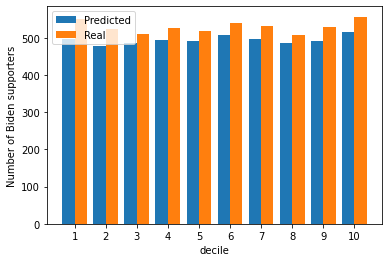

In [ ]:
import matplotlib.pyplot as plt 
X_p = [1,2,3,4,5,6,7,8,9,10]
X_axis = np.arange(len(X_p))
plt.bar(X_axis - 0.2, P, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, R, 0.4, label = 'Real')
plt.xticks(X_axis, X_p)
plt.xlabel("decile")
plt.ylabel("Number of Biden supporters")

plt.legend()


In [ ]:
dec0 = y_train.reset_index()
dec_pred = results.predict(Xs_train)
dec_pred = pd.DataFrame(dec_pred).reset_index()
dec_pred.columns = ['index', 'predicted_probability']
dec_raw = pd.merge(dec0, dec_pred)
dec_raw.head()

,index,support_pres,predicted_probability
0,11752,1,0.992471
1,812,0,0.085239
2,12336,1,0.987678
3,5815,1,0.990844
4,15112,1,0.967281


In [ ]:
dfs2 = dec_raw.sort_values('predicted_probability')
dfs2=np.array_split(dfs2, 10)
P2 = []
R2 = []
for i in dfs2:
  p=i["predicted_probability"].mean()
  r=i["support_pres"].mean()
  P2.append(p)
  R2.append(r)

print(P2)
print(R2)

[0.0632102087420677, 0.10168946456353481, 0.14246647703955764, 0.19741219009841127, 0.3379735874865189, 0.757942566462574, 0.9059953087201333, 0.9551432368823789, 0.9774433436063373, 0.9905342943283597]
[0.05322415557830092, 0.09723643807574207, 0.12589559877175024, 0.18526100307062435, 0.36885245901639346, 0.8043032786885246, 0.9016393442622951, 0.9426229508196722, 0.9651639344262295, 0.985655737704918]


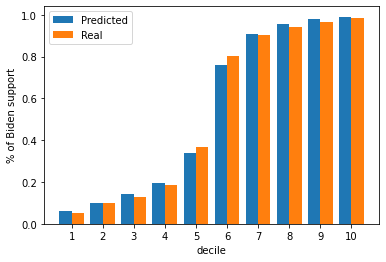

In [ ]:
import matplotlib.pyplot as plt 
X_p = [1,2,3,4,5,6,7,8,9,10]
X_axis = np.arange(len(X_p))
plt.bar(X_axis - 0.2, P2, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, R2, 0.4, label = 'Real')
plt.xticks(X_axis, X_p)
plt.xlabel("decile")
plt.ylabel("% of Biden support")

plt.legend()